In [10]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image
import matplotlib.cm as cm 
import scipy
from collections import Counter

<font size="5">**Punto 1**.</font>


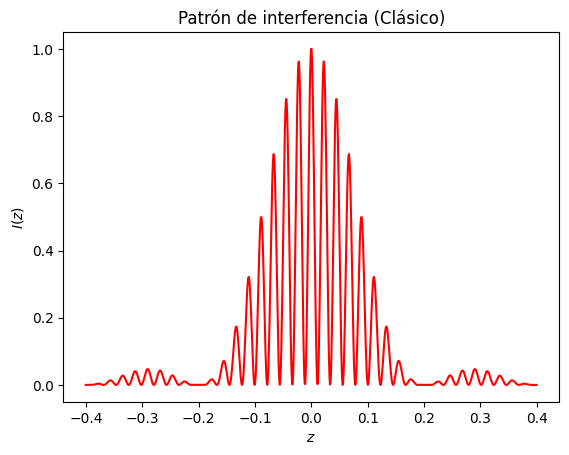

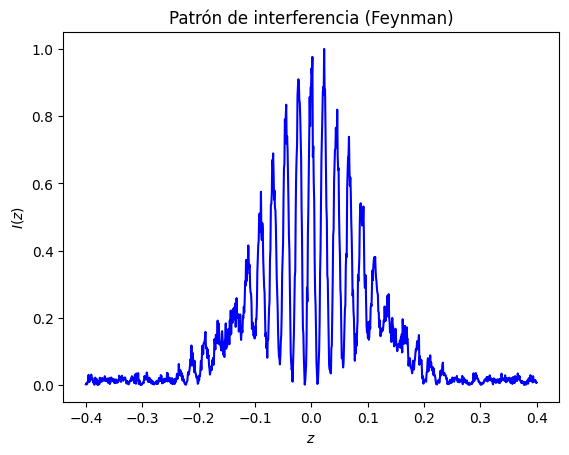

In [2]:
A = 0.1 #cm
long_onda = 670e-7 #cm
D1 = 30 #cm
D2 = 30 #cm
a = 0.01 #cm
d = 0.09 #cm
signo = np.array([-1,1])
N = 10000

def intensities_classical(z):
    theta = np.arctan2(z,D2)
    term1 = (np.cos((np.pi*d/long_onda)*np.sin(theta)))**2
    term2 = (np.sinc((a/long_onda)*np.sin(theta)))**2
    return term1*term2

def intensities_feynman(x,y,z):
    term1 = np.exp(2j * np.pi / long_onda * (D1 + D2))
    term2 = np.exp(np.pi * 1j / (long_onda * D1) * (x - y*np.random.choice(signo, N))**2)
    term3 = np.exp(np.pi * 1j / (long_onda * D1) * (z - y*np.random.choice(signo, N))**2)
    return np.mean(term1 * term2 * term3)

z = np.linspace(-0.4, 0.4, 1000)

p1 = np.zeros(len(z))
p2 = np.zeros(len(z))

for i in range(len(z)):
    x = np.random.uniform(-A/2, A/2, size=N)
    y = np.random.uniform(d/2-a/2, d/2+a/2, size=N)
    p1[i] = intensities_classical(z[i])
    p2[i] = np.absolute(intensities_feynman(x,y,z[i]))**2
    
p1 = p1/p1[np.argmax(p1)]
p2 = p2/p2[np.argmax(p2)]
plt.plot(z, p1, c="r")
plt.title("Patrón de interferencia (Clásico)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
plt.plot(z, p2, c="b")
plt.title("Patrón de interferencia (Feynman)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
#Falta el bono

El patrón de interferencia clásico muestra picos regulares, además su distribución es simétrica y bien definida. El patrón de interferencia debido a la integral de caminos de Feynman también presenta picos que, a diferencia del patrón clásico, no tienen una aparente regularidad. Además es notoria una especie de onda que cubre por debajo el patrón de interferencia cúantico con picos cercanos a +-0.1, lo que no sucede con el patrón clásico.

<font size="5">**Punto 2**.</font>

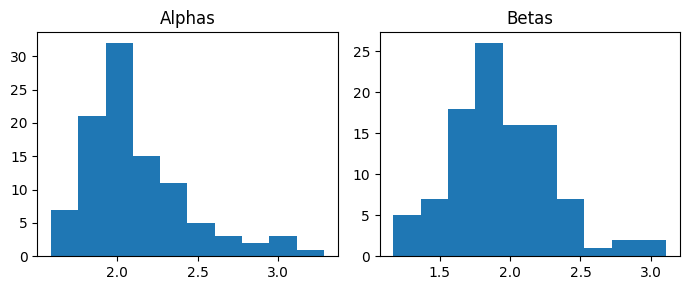

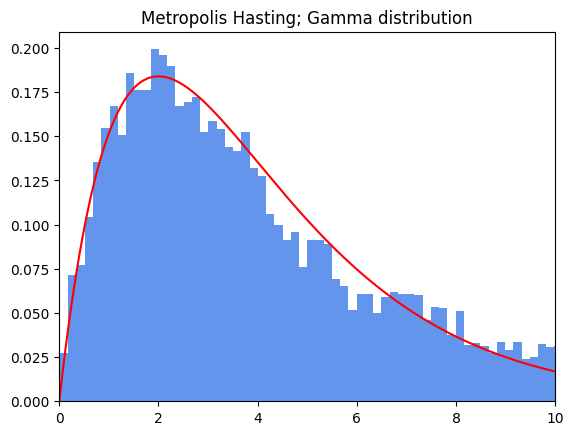

In [31]:
N = 10000
alpha = 2
beta = 2

#Listas
rang = np.linspace(0,10,N)
stats = np.zeros(N)
for n in range(N):
    stats[n] = scipy.stats.gamma(alpha,scale=beta).pdf(rang[n])

#Gamma
def gamma(x,alpha,beta):
    return x**(alpha-1)*np.exp(-x/beta)

#Metrópolis
def metropolis():
    muestras = np.zeros(N)
    x0 = 0.1
    fx0 = gamma(x0,alpha,beta)
    for i in range(N):
        nw_x = x0 + np.random.normal(0, 0.5)
        nw_fx = gamma(nw_x,alpha,beta)    
        accept = nw_fx/fx0
        u = np.random.rand()
        if u <= accept:
            muestras[i] = nw_x
            x0 = nw_x
            fx0 = nw_fx
        else:
            muestras[i] = x0
    return muestras

many_alphas = np.zeros(100)
many_betas = np.zeros(100)
for k in range(100):
    muestras = metropolis()
    jajaj = scipy.stats.gamma.fit(muestras)
    many_alphas[k] = jajaj[0]
    many_betas[k] = jajaj[2] 
    plt.close()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3))
ax1.hist(many_alphas)
ax1.set_title("Alphas")
ax2.hist(many_betas)
ax2.set_title("Betas")
plt.tight_layout()
plt.show()
plt.close()
plt.figure()
plt.title("Metropolis Hasting; Gamma distribution")
plt.hist(muestras, density=True, bins=100, color="cornflowerblue")
plt.plot(rang, stats, c="r")
plt.xlim(left=0,right=10)
plt.show()

In [32]:

conteos_alpha, bins_alpha, _ = plt.hist(many_alphas)
conteos_beta, bins_beta, __ = plt.hist(many_betas)
plt.close()
# Encontrar cuántas veces aparece el valor 1
valor = 2
indice_bin_alpha = np.digitize(valor, bins_alpha) - 1
indice_bin_beta = np.digitize(valor, bins_beta) - 1

print(f"{valor} aparece {conteos_alpha[indice_bin_alpha]} veces en los alphas.")
print(f"{valor} aparece {conteos_beta[indice_bin_beta]} veces en los betas.")


2 aparece 32.0 veces en los alphas.
2 aparece 16.0 veces en los betas.


α se reconstruye exitosamente un 32% de las veces. Por otra parte, β se reconstruye exitosamente un 16% de las veces.

<font size="5">**Punto 3**.</font>

In [4]:
#Parámtros
N = 150
J = 0.2
beta = 10

#Energia
def energy_cross(matriz, i, j):
    e = 0
    for h in range(-1,2):  
        e += matriz[(i+h)%N,j]*matriz[(i+1+h)%N,j] + matriz[(i+h)%N,j]*matriz[(i+h)%N,(j+1)%N] + matriz[(i+h)%N,j]*matriz[(i-1+h)%N,j] + matriz[(i+h)%N,j]*matriz[(i+h)%N,(j-1)%N]
    for p in range(-1,2):
        e += matriz[i,(j+p)%N]*matriz[(i+1)%N,(j+p)%N] + matriz[i,(j+p)%N]*matriz[i,(j+1+p)%N] + matriz[i,(j+p)%N]*matriz[(i-1)%N,(j+p)%N] + matriz[i,(j+p)%N]*matriz[i,(j-1+p)%N]
    return e

matriz = np.random.choice([-1, 1], size=(N, N))
matrices = []
contador = 0
for k in range(400000):
    """
    Sólo para el video
    if k%500 == 0:
        plt.imshow(matriz)
        nombre_archivo = f"frames/{contador+1:03}.png"  
        plt.savefig(nombre_archivo) 
        plt.close() 
        contador+=1   
    """
    rand_index = tuple(np.random.randint(0,N,size=2))
    E0 = energy_cross(matriz, rand_index[0], rand_index[1])
    matriz[rand_index] = matriz[rand_index]*-1  
    E1 = energy_cross(matriz, rand_index[0], rand_index[1])
    diff = -J*(E1-E0)
    if diff > 0:
        u = np.random.rand()
        if u > np.exp(-beta*diff):
            matriz[rand_index] = matriz[rand_index]*-1

# Consola dentro de la carpeta del Github: ffmpeg -framerate 60 -i frames/%03d.png -c:v libx264 -pix_fmt yuv420p video.mp4

In [9]:
Video("video.mp4")

<font size="5">**Punto 4**.</font>

In [6]:
# Leer el archivo de texto de Proyecto Gutenberg
with open('larepublica.txt', 'r', encoding='utf-8') as file:
    s = file.read()

import re
s = re.sub(r"\n{3,}","#",s)
s = re.sub(r"\n","",s)
s = s.replace("#","\n")

s = re.sub(r'[0-9=+\'"‘’*/ñ/]', '', s)

# Convertir todo el texto a minúsculas
s = s.lower()

inicio_idx = s.find("i went down yesterday")
fin_idx = s.find(" end of the project gutenberg ebook the republic ")

if inicio_idx != -1 and fin_idx != -1:
    s = s[inicio_idx:fin_idx]

# Guardar el texto limpio en una variable
texto_limpio = s
caracteres=np.unique(list(texto_limpio))
type(caracteres)

#Ahora vamos a crear nuestros n-gramas
def ngramas (n,texto):
    n_gramas = []
    for i in range(len(texto) - n + 1):
        n_grama = texto[i:i + n]
        n_gramas.append(n_grama)
    return n_gramas
n_gramas=ngramas(3,texto_limpio)
n_gramas=np.array(n_gramas)

n_gramas_unicos = []  # Lista para almacenar n-gramas únicos
for n_grama in n_gramas:
    if n_grama not in n_gramas_unicos:  
        n_gramas_unicos.append(n_grama)  
n_gramas_unicos=np.array(n_gramas_unicos)
#Creemos nuestra matriz
matriz=np.zeros((len(n_gramas_unicos)+1,len(caracteres)+1), dtype=object) #Voy a crear una matriz como el dataframe solo que la esquina izquierda de arriba es cero
hola=np.concatenate((np.array([0]),caracteres))
matriz[0]=hola

for i in range(len(n_gramas_unicos)):
    matriz[i+1][0]=n_gramas_unicos[i] #Hasta acá generamos este dataframe raro en numpy (nunca aprendí pandas)

#Ahora vamos a rellenar la matriz. Recorremos el texto de n-grama en n-grama y vemos el carácter siguiente. 
#Contamos las iteraciones de cada carácter para cada n-grama y así rellenamos la matriz

for i in range(len(texto_limpio) - 3):  # Iterar hasta el penúltimo n-grama
    n_grama_actual = texto_limpio[i:i + 3]  # Extraer el n-grama actual
    siguiente_caracter = texto_limpio[i + 3] if i + 3 < len(texto_limpio) else None  # Obtener el siguiente carácter

    if siguiente_caracter in caracteres:
        # Encontrar índices
        n_grama_index = np.where(n_gramas_unicos == n_grama_actual)[0][0] +1  # +1 para omitir la fila de n-gramas
        
        caracter_index = np.where(caracteres == siguiente_caracter)[0][0] +1 # +1 para omitir la columna de caracteres

        # Incrementar el conteo en la matriz
        matriz[n_grama_index][caracter_index] += 1

#Listo, ahora vamos a hallar probabilidades
matriz_probabilidades = np.zeros_like(matriz, dtype=float)
for i in range(1,matriz.shape[0]):
    fila = matriz[i]
    
    # Sumar los elementos de la fila, omitiendo el primer elemento
    suma_fila = np.sum(fila[1:])  # Omitir el primer elemento que es un str
    print(suma_fila)
    # Verificar que la suma no sea cero
    if suma_fila > 0:
        # Dividir cada elemento de la fila (excepto el primer) por la suma
        matriz_probabilidades[i, 1:] = fila[1:] / suma_fila
    else:
        # Si la suma es cero, podemos dejar la fila como ceros
        matriz_probabilidades[i, 1:] = 0

#Me di cuenta de que esta cosa no genera bien los ngramas únicos y no sé por qué. Lo siguiente sería con matriz
#de probabilidades y np.choice ir generando un texto pero eso puede fallar por que la matriz quedó rara y no sé por qué.



138
1315
17
1004
582
200
716
83
327
257
111
128
493
817
305
1027
33
20
50
820
931
3339
3263
823
13394
12798
8515
834
65
92
21
3
9
41
535
777
1913
672
888
837
46
76
80
101
69
68
748
1319
1707
2345
1107
370
766
4560
4300
582
1597
211
110
349
117
32
283
4
47
2217
2634
2949
985
1234
89
345
91
580
755
443
1043
102
227
244
2815
56
228
90
3
201
205
147
820
104
29
30
18
942
575
1688
529
774
162
7
36
364
778
390
7
1
1
39
402
267
355
133
1737
1002
2717
176
58
240
31
123
252
44
58
452
35
143
88
129
23
3
1
3
501
5979
6071
5812
981
1017
355
241
367
716
3074
220
136
164
161
402
1106
1418
738
90
422
392
505
1820
1979
316
647
334
231
3052
2328
585
3330
646
310
1537
882
247
132
247
1079
1165
1143
525
774
418
994
761
1
2
44
116
7
10
42
380
1143
649
619
184
36
765
103
73
52
65
282
902
1408
1375
1392
1705
219
336
1605
1684
1757
47
413
45
93
206
1412
793
3067
86
29
66
200
815
49
161
199
56
683
508
72
75
477
102
82
296
330
248
1566
1636
35
28
49
56
79
191
212
195
40
269
183
725
872
1181
1873
319
481
169
61


<font size="5">**Punto 5**.</font>

In [7]:
A=1000 #Tasa decaimiento
B=20 #Tasa extracción
vidaU = 23.34*(1/60)*(1/24) #Dias
vidaNp = 2.36 #Dias
λU = np.log(2)/vidaU
λNp = np.log(2)/vidaNp

U_est = A/λU
Pu_est = A/B
Np_est = A/λNp

#SISTEMA DETERMINISTA

def system(t,Y, A, B, λU, λNp):
    u, Np, pu = Y
    return [A-λU*u, #dU/dt
            λU*u - λNp*Np, #dNp/dt
            λNp*Np - B*pu #dPu/dt
            ]

#No sé de que otra manera acercarme al estado estable
def eventU(t, Y, A, B, λU, λNp):
    u, Np, pu = Y
    return round(u - U_est, 1)

def eventNp(t, Y, A, B, λU, λNp):
    u, Np, pu = Y
    return round(abs(Np - Np_est))
  
def eventPu(t, Y, A, B, λU, λNp):
    u, Np, pu = Y  
    return round(pu - Pu_est, 1)
    
sol = solve_ivp(system, 
                t_span=(0,100),
                y0=[0, 0, 0], #La planta empieza completamente limpia
                args=(A, B, λU, λNp), 
                max_step=0.05,
                dense_output=True,
                events=[eventU, eventNp, eventPu])


print(f"Uranio se acerca al estado estable de {round(U_est,3)} en {round(sol.t_events[0][0],3)} dias")
print(f"Plutonio se acerca al estado estable de {round(Pu_est,3)} en {round(sol.t_events[2][0],3)} dias")
print(f"Neptunio no se acerca lo suficiente al estado estable de {round(Np_est,3)} en 30 dias")

Uranio se acerca al estado estable de 23.384 en 0.191 dias
Plutonio se acerca al estado estable de 50.0 en 23.641 dias
Neptunio no se acerca lo suficiente al estado estable de 3404.76 en 30 dias


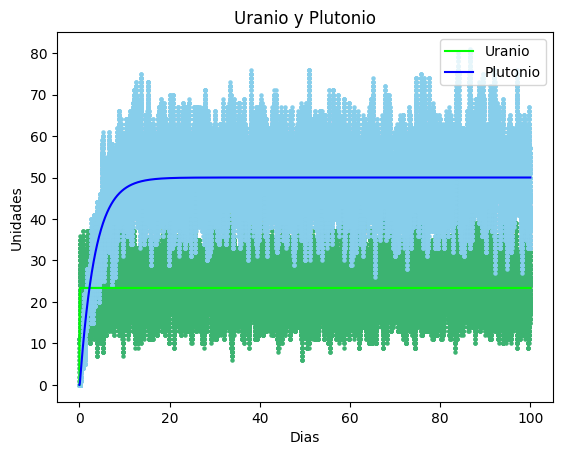

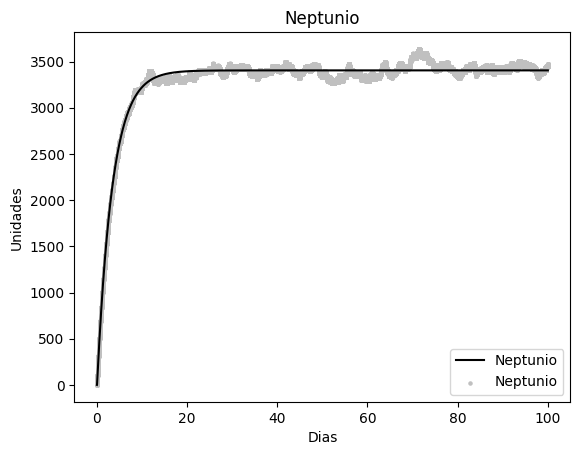

Con 100,000,000 simulaciones hasta 100 dias. Las veces que el plutonio pasó el nivel 80 fueron 8, por lo tanto su probabilidad es de 8e-08


In [8]:
#SISTEMA ESTOCÁSTICO
A=1000 #Tasa decaimiento
B=20 #Tasa extracción
vidaU = 23.34*(1/60)*(1/24) #Dias
vidaNp = 2.36 #Dias
λU = np.log(2)/vidaU
λNp = np.log(2)/vidaNp


R = np.array([1,2,3,4]) #Eventos

#Estado inicial
U = 0
Np = 0
Pu = 0
tiempo = 0

Uranium = [0]
Neptunium = [0]
Plutonium = [0]
temp = [0]

def evolucion(U, Np, Pu, A, λU, λNp, B, tiempo):
    tasas = np.array([A, U*λU, Np*λNp, B*Pu]) #Tasa de ocurrencia eventos
    tiempo += np.random.exponential(1/tasas.sum())
    r = np.random.choice(R,p=tasas/tasas.sum())
    if r == 1:
        U+=1
    elif r == 2:
        U-=1
        Np+=1
    elif r == 3:
        Np-=1
        Pu+=1
    else:
        Pu-=1
    return U, Np, Pu, tiempo

contadorPu = 0
N = 100_000_000
for k in range(N):
    while tiempo < 100:
        U, Np, Pu, tiempo = evolucion(U, Np, Pu, A, λU, λNp, B, tiempo)
        Uranium.append(U)
        Neptunium.append(Np)
        Plutonium.append(Pu)
        temp.append(tiempo)
        if Pu>=80:
            contadorPu+=1
    
plt.title("Uranio y Plutonio")
plt.ylabel("Unidades")
plt.xlabel("Dias")
plt.plot(sol.t, sol.y[0], c="lime", label="Uranio") 
plt.plot(sol.t, sol.y[2], c="blue", label="Plutonio")
plt.scatter(temp, Uranium, c="mediumseagreen", s=5)
plt.scatter(temp, Plutonium, c="skyblue", s=5)
plt.legend(loc=1)
plt.show()
plt.title("Neptunio")
plt.xlabel("Dias")
plt.ylabel("Unidades")
plt.plot(sol.t, sol.y[1], c="black", label="Neptunio")
plt.scatter(temp, Neptunium, c="silver", label="Neptunio", s=5)
plt.legend(loc=4)
plt.show()
print(f"Con {N:,} simulaciones hasta 100 dias. Las veces que el plutonio pasó el nivel 80 fueron {contadorPu}, por lo tanto su probabilidad es de {contadorPu/N}")


Nota: En realidad la probabilidad es mucho menor. Si se hacen varias tomas de 100 millones de simulaciones hasta 100 dias, en muchas de estas el plutonio nunca pasa de 80.

Si se quiere disminuir la probabilidad de que el plutonio supere el nivel 8 se puede disminuir la probabilidad de que este aumente en 1, esta probabilidad está dada por Np*λNp, sin embargo λNp estos parámetros no se pueden alterar en la realidad. Por lo tanto, se puede aumentar la tasa de extracción de plutonio, lo que hace que sea menos probable que este llegue a un nivel mayor a 80.